> https://github.com/donghwan2/Text_analysis/blob/master/%ED%99%94%EC%9E%A5%ED%92%88%20%EB%A6%AC%EB%B7%B0%20%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D-release.ipynb

# 텍스트 파일 불러오기 및 전처리

### 작은아씨들 (test set)

In [107]:
from nltk import sent_tokenize

file = 'C:/data/fiction/little_women.txt'
data = open(file, 'r', encoding='utf-8')
data = data.read()
sentences = sent_tokenize(data) # 문장 토큰화

In [93]:
sentences

["Little Women\n\n\n1933, RKO Radio Pictures Inc., Directed by George Cukor, Writing \ncredits: Louisa May Alcott(novel: as Louisa M. Alcott), Sarah Y. \nMason & Vicor Heerman\n\n\n\n\n(00:02:30) \n\nMRS. MARCH\nSo you're going to Washington?",
 "MAN\nYes, Ma'am.",
 'My son is sick in a hospital there.',
 'MRS. MARCH\nOh.',
 'This will be an anxious Christmas for you.',
 'I think this one \nwill do.',
 "Let's try this.",
 'Is it your only son?',
 "MAN\nNo, Ma'am.",
 'I had four, two were killed.',
 'One is a prisoner.',
 "MRS. MARCH\nYou've done a great deal for your country, sir.",
 "MAN\nOh, not a might more than I ought to, Ma'am.",
 "I'd go myself if I \nwas any use.",
 'Thank you for the overcoat.',
 'MRS. MARCH\nWait a minute.',
 'I hope you find him better.',
 "MAN\nThank you, Ma'am.",
 'God bless you.',
 'Merry Christmas.',
 'Merry \nChristmas.',
 'MRS. MARCH\nMerry Christmas.',
 '(00:03:22)**\n\nSHOP ASSISTANT\nOh, Mrs. March.',
 'Will you sign this so I can get it off?',
 "Wh

In [108]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

speaker = []
text = []
token = []
for sentence in sentences:
    people = ['AMY','MEG','JO','BETH','MRS. MARCH','HANNAH','AUNT MARCH','MR. DAVIS','LAURIE','MR. LAURENCE']
    for person in people:
        if person in sentence:
            speaker.append(person)
            idx = sentence.index(person)
            text.append(sentence[idx+len(person)+1:])
            
            # 단어 토큰화
            text_to_word_sequence(sentence[idx+len(person)+1:])
            token.append(text_to_word_sequence(sentence[idx+len(person)+1:]))

In [110]:
import pandas as pd

excel_data = {'speaker': speaker,
             'text': text,
             'token': token}

df = pd.DataFrame(excel_data, columns=['speaker', 'text', 'token'])
df.to_csv('C:/data/fiction/new_little_women.csv')

### 이솝우화

In [4]:
from nltk import sent_tokenize

file = 'C:/data/fiction/aesop.txt'
data = open(file, 'r', encoding='utf-8')
data = data.read()
sentences = sent_tokenize(data) # 문장 토큰화
sentences

['THE FOX AND THE GRAPES\n\n\nA hungry Fox saw some fine bunches of Grapes hanging from a vine that\nwas trained along a high trellis, and did his best to reach them by\njumping as high as he could into the air.',
 'But it was all in vain, for\nthey were just out of reach: so he gave up trying, and walked away\nwith an air of dignity and unconcern, remarking, "I thought those\nGrapes were ripe, but I see now they are quite sour."',
 'THE GOOSE THAT LAID THE GOLDEN EGGS\n\n\nA Man and his Wife had the good fortune to possess a Goose which laid\na Golden Egg every day.',
 'Lucky though they were, they soon began to\nthink they were not getting rich fast enough, and, imagining the bird\nmust be made of gold inside, they decided to kill it in order to\nsecure the whole store of precious metal at once.',
 'But when they cut it\nopen they found it was just like any other goose.',
 'Thus, they neither\ngot rich all at once, as they had hoped, nor enjoyed any longer the\ndaily addition to thei

In [15]:
import re
import pandas as pd
from tensorflow.keras.preprocessing.text import text_to_word_sequence

text = []
token = []
for sentence in sentences:
    sentence = re.sub('[":;_]','',sentence)
    # 제목\n\n\n제거
    if '\n\n\n' in sentence:
        idx = sentence.index('\n')
        sentence=sentence[idx+3:]
    text.append(sentence)
    # 단어 토큰화
    text_to_word_sequence(sentence)
    token.append(text_to_word_sequence(sentence))

excel_data = {'text': text,
             'token': token}

df = pd.DataFrame(excel_data, columns=['text', 'token'])
df
# df.to_csv('C:/data/fiction/new_aesop.csv')

,text,token
0,A hungry Fox saw some fine bunches of Grapes h...,"[a, hungry, fox, saw, some, fine, bunches, of,..."
1,"But it was all in vain, for\nthey were just ou...","[but, it, was, all, in, vain, for, they, were,..."
2,A Man and his Wife had the good fortune to pos...,"[a, man, and, his, wife, had, the, good, fortu..."
3,"Lucky though they were, they soon began to\nth...","[lucky, though, they, were, they, soon, began,..."
4,But when they cut it\nopen they found it was j...,"[but, when, they, cut, it, open, they, found, ..."
...,...,...
1569,"But the\nNightingale replied, Time was when I ...","[but, the, nightingale, replied, time, was, wh..."
1570,The scene of past sufferings revives painful m...,"[the, scene, of, past, sufferings, revives, pa..."
1571,"A Traveller, exhausted with fatigue after a lo...","[a, traveller, exhausted, with, fatigue, after..."
1572,"He was within\nan ace of falling in, when Dame...","[he, was, within, an, ace, of, falling, in, wh..."


## 학습

In [1]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 100
W2V_WINDOW = 3
W2V_EPOCH = 16
W2V_MIN_COUNT = 3

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

In [2]:
import pandas as pd

fname = 'C:/data/fiction/new_little_women.csv'
csv = pd.read_csv(fname)
df_new = pd.DataFrame(csv)
df_new

,Unnamed: 0,speaker,text,token,score
0,0,MRS. MARCH,So you're going to Washington?,"['so', ""you're"", 'going', 'to', 'washington']",2
1,1,MRS. MARCH,Oh.,['oh'],2
2,2,MRS. MARCH,"You've done a great deal for your country, sir.","[""you've"", 'done', 'a', 'great', 'deal', 'for'...",3
3,3,MRS. MARCH,Wait a minute.,"['wait', 'a', 'minute']",2
4,4,MRS. MARCH,Merry Christmas.,"['merry', 'christmas']",2
...,...,...,...,...,...
753,753,JO,"Oh, no, only my family.","['oh', 'no', 'only', 'my', 'family']",1
754,754,JO,Yes.,['yes'],3
755,755,JO,It's the first time they've been together for ...,"[""it's"", 'the', 'first', 'time', ""they've"", 'b...",2
756,756,JO,They're not empty now.,"[""they're"", 'not', 'empty', 'now']",2


In [3]:
decode_map = {1:"Negative", 2:"Neutral", 3:"Positive"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [4]:
%%time
df_new.score = df_new.score.apply(lambda x: decode_sentiment(x))

Wall time: 1.99 ms


Text(0.5, 1.0, 'Dataset labels distribuition')

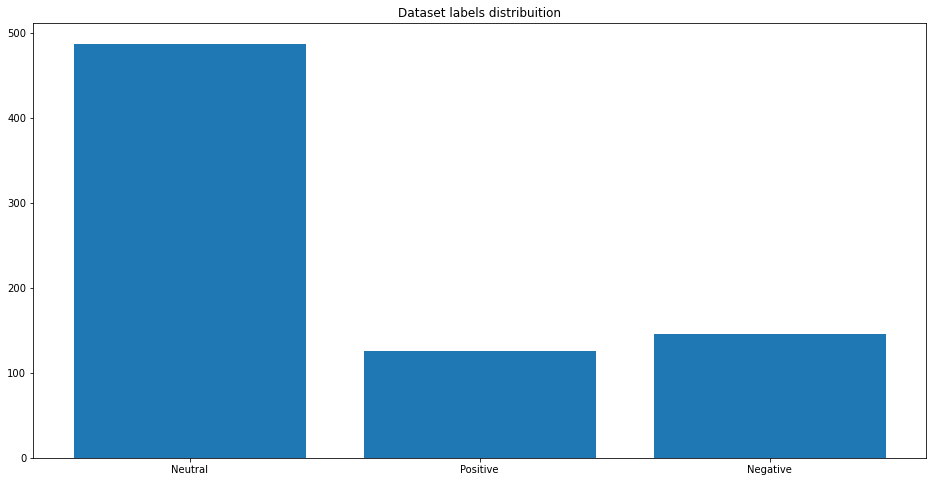

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

score_cnt = Counter(df_new.score)

plt.figure(figsize=(16,8))
plt.bar(score_cnt.keys(), score_cnt.values())
plt.title("Dataset labels distribuition")

In [7]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_new, test_size=0.2, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 606
TEST size: 152


In [8]:
%%time
documents = [_text.split() for _text in df_train.text] 

Wall time: 998 µs


In [9]:
import gensim

w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [10]:
w2v_model.build_vocab(documents)

In [11]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 220


In [12]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

Wall time: 91.3 ms


(17376, 46112)

In [13]:
print(words)

dict_keys(['Oh,', "that's", 'too', 'what', 'we', 'want', 'and', 'have', 'a', 'little', 'PROFESSOR', 'Good', 'night,', 'Marmee.', 'Thank', 'you,', 'Beth.', 'Well,', 'I', 'know', 'it.', 'How', 'do', 'you', 'Miss', 'to', 'me', 'now.', 'My', 'Bethy.', 'No.', 'No,', 'Auntie.', 'What', 'is', 'it?', 'Merry', 'Not', "I'm", 'old', 'Yes,', 'know.', 'better', 'go.', 'Bethy,', "You're", 'some', 'Amy.', 'darling.', 'The', 'first', 'for', "How's", 'your', 'thank', 'Mr.', 'you.', 'not', 'going', 'be', 'if', 'can', 'help', 'my', 'Jo!', 'Laurie.', "I'll", 'tell', 'Jo,', 'in', 'just', 'look', 'at', "It's", "don't", 'well,', 'But', "it's", 'time', 'take', 'Jo.', 'She', 'down', 'the', 'And', 'us', "There's", 'from', 'dear.', 'Come', 'here.', 'Meg.', 'Oh.', "you're", 'about', 'will', 'Laurie', 'his', 'would', 'love', 'him', 'as', 'always', 'of', 'but', 'like', 'that.', 'go', 'with', 'where', 'are', 'Where?', "I'd", 'get', 'Aunt', 'came', 'sir.', 'Then', 'no.', 'Christmas.', 'that', 'it', 'could', 'no,', 'A

In [14]:
w2v_model.most_similar("Good")

C:\Users\student\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('them', 0.7155588865280151),
 ('I', 0.699283242225647),
 ('it,', 0.69823157787323),
 ('to', 0.6982237100601196),
 ('and', 0.6960357427597046),
 ('when', 0.6959343552589417),
 ('the', 0.6931194067001343),
 ('little', 0.687885582447052),
 ('if', 0.6841879487037659),
 ('a', 0.6839237213134766)]

In [15]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer

# %%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1

print("Total words", vocab_size)

Total words 735


In [16]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

In [17]:
labels = df_train.score.unique().tolist()
labels

['Negative', 'Positive', 'Neutral']

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df_train.score.tolist())

y_train = encoder.transform(df_train.score.tolist())
y_test = encoder.transform(df_test.score.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (606, 1)
y_test (152, 1)


In [19]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (606, 300)
y_train (606, 1)

x_test (152, 300)
y_test (152, 1)


In [20]:
y_train[:10]

array([[0],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2]], dtype=int64)

In [21]:
import numpy as np

embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(735, 100)


In [22]:
from keras.layers.embeddings import Embedding

embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [23]:
from keras import Sequential
from keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          73500     
_________________________________________________________________
dropout (Dropout)            (None, 300, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 154,001
Trainable params: 80,501
Non-trainable params: 73,500
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [25]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=2)]

In [26]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
1/1 [==============================] - 0s 403ms/step - loss: 0.6926 - accuracy: 0.3945 - val_loss: 0.6820 - val_accuracy: 0.6393
Epoch 2/8
1/1 [==============================] - 0s 75ms/step - loss: 0.6837 - accuracy: 0.6569 - val_loss: 0.6704 - val_accuracy: 0.6393
Epoch 3/8
1/1 [==============================] - 0s 74ms/step - loss: 0.6735 - accuracy: 0.6569 - val_loss: 0.6568 - val_accuracy: 0.6393
Epoch 4/8
1/1 [==============================] - 0s 67ms/step - loss: 0.6612 - accuracy: 0.6569 - val_loss: 0.6402 - val_accuracy: 0.6393
Epoch 5/8
1/1 [==============================] - 0s 79ms/step - loss: 0.6467 - accuracy: 0.6569 - val_loss: 0.6190 - val_accuracy: 0.6393
Epoch 6/8
1/1 [==============================] - 0s 68ms/step - loss: 0.6282 - accuracy: 0.6569 - val_loss: 0.5908 - val_accuracy: 0.6393
Epoch 7/8
1/1 [==============================] - 0s 66ms/step - loss: 0.6029 - accuracy: 0.6569 - val_loss: 0.5511 - val_accuracy: 0.6393
Epoch 8/8
1/1 [==================

In [27]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

1/1 [==============================] - 0s 0s/step - loss: 0.5347 - accuracy: 0.5921

ACCURACY: 0.5921052694320679
LOSS: 0.5347329378128052
Wall time: 192 ms


In [28]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [29]:
import time

def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [30]:
predict("I love the music")

{'label': 'NEUTRAL',
 'score': 0.6040968894958496,
 'elapsed_time': 0.23035979270935059}

In [31]:
predict("I hate the rain")

{'label': 'NEUTRAL',
 'score': 0.60245680809021,
 'elapsed_time': 0.052059173583984375}

In [32]:
predict("i don't know what i'm doing")

{'label': 'NEUTRAL',
 'score': 0.6040791273117065,
 'elapsed_time': 0.050962209701538086}

In [34]:
predict("Not")

{'label': 'NEUTRAL',
 'score': 0.5988585948944092,
 'elapsed_time': 0.05086326599121094}